# MTA Project

The code/results for my project are shown here. This is to show how the graphs used in the presentation are obtained. The data cleaning, aggregation, and plotting code are written in functions in the MTA_Functional.py script

First step is to import functions needed for this execution

In [2]:
#First import functions needed

import pandas as pd
import os
import MTA_Functional as MT


The code below takes in a path directory of where are the MTA yearly data is saved, and appends the directories of each csv file into the list

In [4]:

file_folder = 'MTA_RANGE2'

file_filelist = []
for root, subdirectories, files in os.walk(file_folder):
    for file in files:
        if file.endswith('.csv'):
            file_filelist.append(os.path.join(root, file))
            
file_filelist


['MTA_RANGE2/2019.csv', 'MTA_RANGE2/2018.csv', 'MTA_RANGE2/2017.csv']

Using functions MT.loaddata, I am loading in the data for each year's .csv file to variable `Main`. 
The data will be aggregated into daily ridership data in `Daily` using MT.daily_data.
The data will also be aggregated into weekly/time_interval data in `Hourly` using MT.hourly_weekly_data.
`Daily` is appended to `Day_Final` and `Hourly` is appended to `Hour_Final` for graphing later.

In [3]:
Day_Final = pd.DataFrame() #DataFrame for appending
Hour_Final = pd.DataFrame() #DataFrame for appending
Line = '7'
for index,file in enumerate(file_filelist):
    Year = files[index][0:4]

    Main = MT.loaddata(file) #Load dataframe into Main
    
    Day = MT.daily_data(Main,line = Line, year = Year) #Create Daily ridership dataframe
    Day_Final = Day_Final.append(Day) #Append
    
    Hour = MT.hourly_week_data(Main,line = Line, year = Year) #Create Weekly/Hourly ridership dataframe
    Hour_Final = Hour_Final.append(Hour) #Append


/Users/kenhua/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/kenhua/Document/Software/Metis_Course/Module_1_EDA/Metis_EDA_MTA_Project/MTA_Functional.py:79: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  hourly_group_7 = hourly_group_7.groupby(['C/A','UNIT','SCP','STATION','DATE',pd.Grouper(freq='240Min', base=120, label='right')]).sum()


In [4]:
Main.head(10) #Show Main loaded dataframe

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,03:00:00,REGULAR,6455840,2184987,2017-12-23 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,07:00:00,REGULAR,6455856,2184995,2017-12-23 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,11:00:00,REGULAR,6455899,2185082,2017-12-23 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,15:00:00,REGULAR,6456038,2185156,2017-12-23 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,19:00:00,REGULAR,6456327,2185197,2017-12-23 19:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,23:00:00,REGULAR,6456484,2185222,2017-12-23 23:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2017,03:00:00,REGULAR,6456525,2185229,2017-12-24 03:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2017,07:00:00,REGULAR,6456535,2185245,2017-12-24 07:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2017,11:00:00,REGULAR,6456582,2185295,2017-12-24 11:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2017,15:00:00,REGULAR,6456748,2185348,2017-12-24 15:00:00


In [5]:
Day_Final.head(10) #Show Day_Final dataframe

,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_ENTRIES_EXITS,3_DAY_MOVING_AVERAGE,SEASON,YEAR
57,03/01/2019,700410.0,603548.0,1303958.0,1.297626e+06,2,2019
58,03/02/2019,366787.0,332931.0,699718.0,1.101967e+06,2,2019
59,03/03/2019,299944.0,265243.0,565187.0,8.562877e+05,2,2019
60,03/04/2019,568879.0,487631.0,1056510.0,7.738050e+05,2,2019
61,03/05/2019,728295.0,591700.0,1319995.0,9.805640e+05,2,2019
62,03/06/2019,723200.0,592125.0,1315325.0,1.230610e+06,2,2019
63,03/07/2019,724067.0,594200.0,1318267.0,1.317862e+06,2,2019
64,03/08/2019,715787.0,604186.0,1319973.0,1.317855e+06,2,2019
65,03/09/2019,412343.0,384911.0,797254.0,1.145165e+06,2,2019
66,03/10/2019,262287.0,240132.0,502419.0,8.732153e+05,2,2019


In [6]:
Hour_Final.head(10) #Show Hour_Final dataframe

,DAY_OF_WEEK,DAY_OF_WEEK_NAME,TIME_RANGE,HOUR,HOURLY_ENTRIES,HOURLY_EXITS,TOTAL_ENTRIES_EXITS,YEAR
0,0,Monday,00:00-04:00,6,622169.0,603318.0,1225487.0,2019
1,0,Monday,04:00-08:00,10,4500943.0,3017133.0,7518076.0,2019
2,0,Monday,08:00-12:00,14,8186797.0,8002569.0,16189366.0,2019
3,0,Monday,12:00-16:00,18,6294800.0,5568558.0,11863358.0,2019
4,0,Monday,16:00-20:00,22,11203192.0,9159360.0,20362552.0,2019
5,0,Monday,20:00-00:00,2,2768273.0,2483452.0,5251725.0,2019
6,1,Tuesday,00:00-04:00,6,688058.0,678737.0,1366795.0,2019
7,1,Tuesday,04:00-08:00,10,4899903.0,3302704.0,8202607.0,2019
8,1,Tuesday,08:00-12:00,14,8662765.0,8567428.0,17230193.0,2019
9,1,Tuesday,12:00-16:00,18,6570819.0,5864964.0,12435783.0,2019


# Maintenance Project 1

Using the `Day_Final` dataframe, I call the MT.plot_daily_stacked function to plot the data in subplots

/Users/kenhua/Document/Software/Metis_Course/Module_1_EDA/Metis_EDA_MTA_Project/MTA_Functional.py:153: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


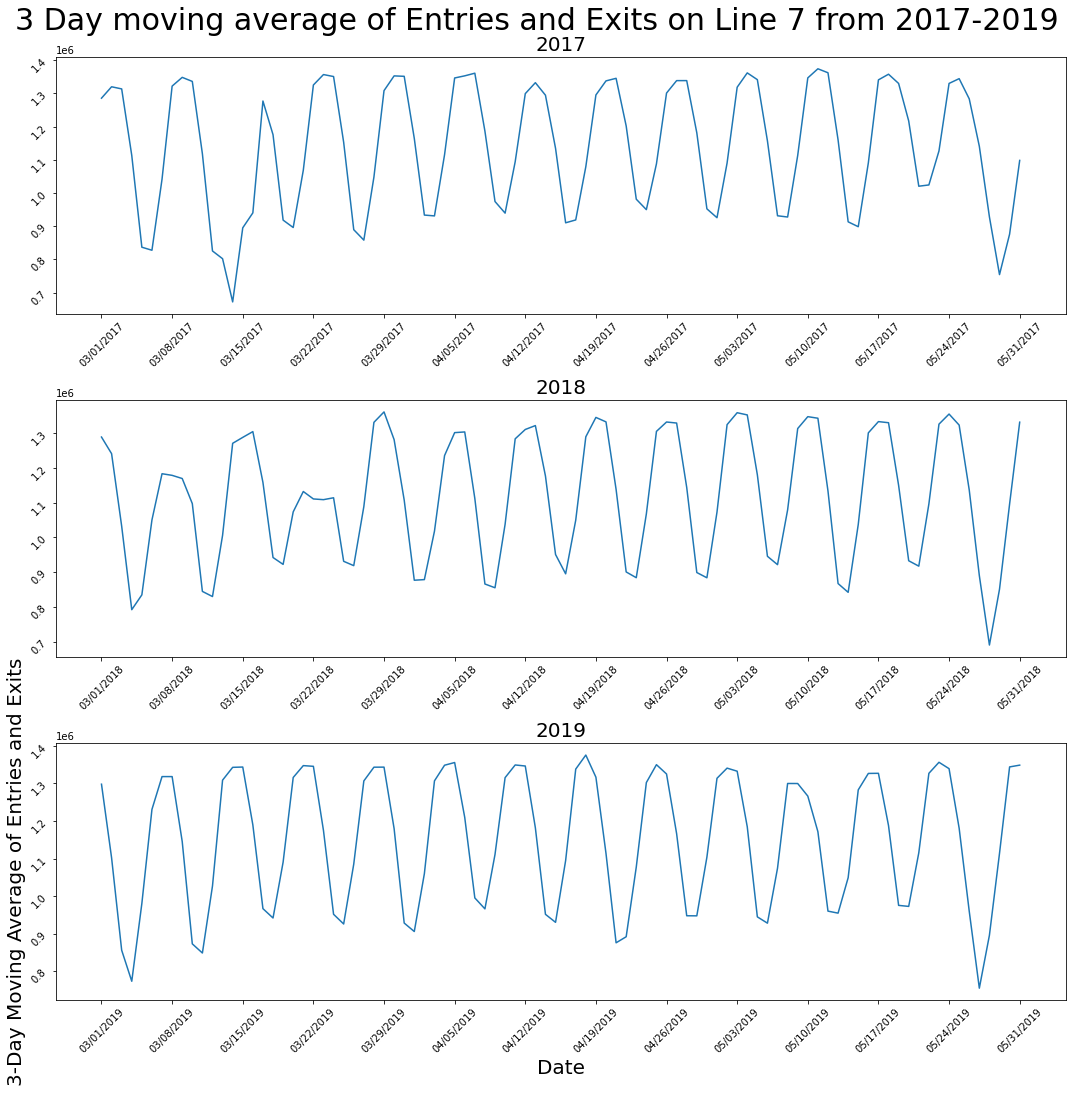

In [7]:
%matplotlib inline


z = MT.plot_daily_stacked(Day_Final)


# Maintenance Project 2

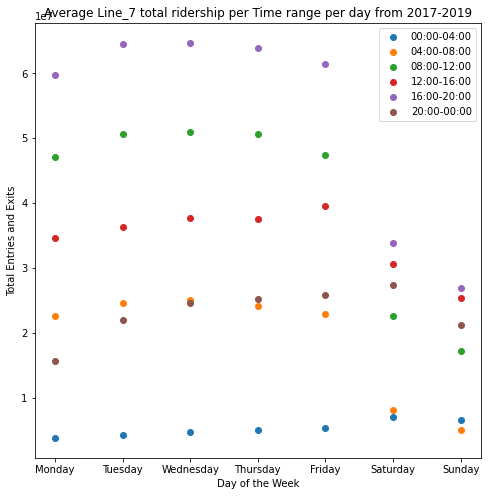

In [8]:
Hour_combined = Hour_Final.groupby(['DAY_OF_WEEK','DAY_OF_WEEK_NAME','TIME_RANGE','HOUR'], as_index = False)['TOTAL_ENTRIES_EXITS'].sum()

MT.plot_hourly(Hour_combined,'Line_7')

# Repeating Maitenance Project 2 for Line 1

I am rerunning the code to select for Line 1 instead. Then we can compare Line 1 weekly-hourly data to Line 7 weekly-hourly data.

In [5]:
Day_Final = pd.DataFrame() #DataFrame for appending
Hour_Final = pd.DataFrame() #DataFrame for appending
Line = '1'
for index,file in enumerate(file_filelist):
    Year = files[index][0:4]

    Main = MT.loaddata(file) #Load dataframe into Main
        
    Hour = MT.hourly_week_data(Main,line = Line, year = Year) #Create Weekly/Hourly ridership dataframe
    Hour_Final = Hour_Final.append(Hour) #Append


/Users/kenhua/Document/Software/Metis_Course/Module_1_EDA/Metis_EDA_MTA_Project/MTA_Functional.py:79: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  hourly_group_7 = hourly_group_7.groupby(['C/A','UNIT','SCP','STATION','DATE',pd.Grouper(freq='240Min', base=120, label='right')]).sum()


Plotting Weekly-Hourly Data for Line 1

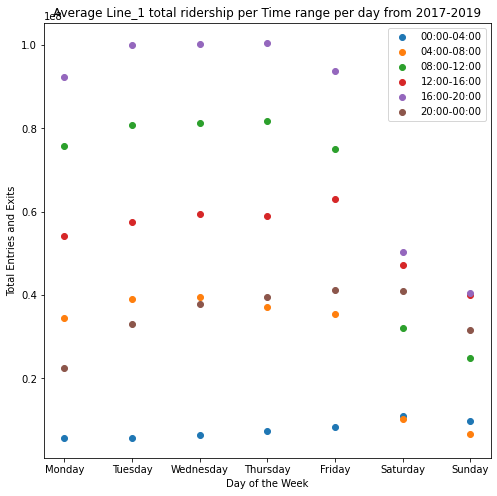

In [6]:
Hour_combined = Hour_Final.groupby(['DAY_OF_WEEK','DAY_OF_WEEK_NAME','TIME_RANGE','HOUR'], as_index = False)['TOTAL_ENTRIES_EXITS'].sum()

MT.plot_hourly(Hour_combined,'Line_1')